## Linear Search

In [1]:
pass #To-Do的感覺，先把一個function放在這邊之後再寫

### duplicated target in list

In [17]:
# Search list and target value
tour_locations = [ "New York City", "Los Angeles", "Bangkok", "Istanbul", "London", "New York City", "Toronto"]
target_city = "New York City"

#Linear Search Algorithm
def linear_search(search_list, target_value):
    matches = list()
    for idx in range(len(search_list)):
        if search_list[idx] == target_value:
            matches.append(idx)
    if len(matches) != 0:
        return matches
    else:
        raise ValueError("{0} not in list".format(target_value))

#Function call
tour_stops = linear_search(tour_locations, target_city)
print(tour_stops)

[0, 5]


### find maximum value using linear search

In [18]:
# Search list
test_scores = [88, 93, 75, 100, 80, 67, 71, 92, 90, 83]

#Linear Search Algorithm
def linear_search(search_list):
    maximum_score_index = None
    for idx in range(len(search_list)):
        if maximum_score_index is None or search_list[idx] > search_list[maximum_score_index]:
            maximum_score_index = idx
    return maximum_score_index

# Function call
highest_score = linear_search(test_scores)

#Prints out the highest score in the list
print(highest_score)

3


## Binary Search

### using duplicated sublist (waste of memory)

In [38]:
def binary_search(sorted_list, target):
    #base case1 : can't find target value
    if not sorted_list:
        return 'value not found'
    
    #不會進位會退位，所以right sublist才要+1
    mid_idx = len(sorted_list)//2
    mid_val = sorted_list[mid_idx]

    #base case2 : find target value
    if mid_val == target:
        return mid_idx
    
    #recursive step
    #
    if mid_val > target:
        left_half = sorted_list[:mid_idx]
        print(left_half)
        return binary_search(left_half, target)
    
    if mid_val < target:
        right_half = sorted_list[mid_idx + 1:]
        result = binary_search(right_half, target)
        #因為要回傳result + mid_idx + 1 => 多設立一個result這個變數
        #result這個變數有時候會回傳文字 => 多設一個condition
        if result == 'value not found':
            return result
        #because we cut the list into sublist, we need to return result + mid_idx + 1 
        else:
            return result + mid_idx + 1
# For testing:
sorted_values = [13, 14, 15, 16, 17]
print(binary_search(sorted_values, 19))

value not found


### pointer version (not need to cut into sublist and strange arithmetic)

In [46]:
def binary_search(sorted_list, left_pointer, right_pointer, target):
    # this condition indicates we've reached an empty "sub-list"
    if left_pointer >= right_pointer:
        return "value not found"

    # We calculate the middle index from the pointers now
    mid_idx = (left_pointer + right_pointer) // 2
    mid_val = sorted_list[mid_idx]

    if mid_val == target:
        return mid_idx
    if mid_val > target:
    # we reduce the sub-list by passing in a new right_pointer
        return binary_search(sorted_list, left_pointer, mid_idx, target)
    if mid_val < target:
    # we reduce the sub-list by passing in a new left_pointer
        return binary_search(sorted_list, mid_idx + 1, right_pointer, target)

values = [77, 80, 102, 123, 288, 300, 540]
target = 102
start_of_values = 0
end_of_values = len(values)
result = binary_search(values, start_of_values, end_of_values, target)
if result == "value not found":
    print(result)
else:
    print("element {0} is located at index {1}".format(target, result))

element 102 is located at index 2


### iterative version

In [ ]:
def binary_search(sorted_list, target):
    left_pointer = 0
    right_pointer = len(sorted_list)

    # fill in the condition for the while loop
    while left_pointer != right_pointer:
        # calculate the middle index using the two pointers
        mid_idx = (left_pointer + right_pointer) // 2
        mid_val = sorted_list[mid_idx]
        if mid_val == target:
            return mid_idx
        if target < mid_val:
            # set the right_pointer to the appropriate value
            right_pointer = mid_idx
        if target > mid_val:
            # set the left_pointer to the appropriate value
            left_pointer = mid_idx

    return "Value not in list"

# test cases
print(binary_search([5,6,7,8,9], 9))
print(binary_search([5,6,7,8,9,10], 11))
print(binary_search([5,6,7,8,9], 8))
print(binary_search([5,6,7,8,9], 4))
print(binary_search([5,6,7,8,9], 6))

### search in a sparse list

In [41]:
def sparse_search(data, search_val):
    print("Data: " + str(data))
    print("Search Value: " + str(search_val))
    first = 0
    last = len(data) - 1
    while first <= last:
        mid = (first + last) // 2
        if not data[mid]: 
            left = mid - 1
            right = mid + 1
            #iterate through the list from the middle until it finds a none-empty value
            while True:
                if left < first and right > last:
                    print("{0} is not in the dataset".format(search_val))
                    return
                #data[right] is not empty
                elif right <= last and data[right]:
                    mid = right
                    break
                elif left >= first and data[left]:
                    mid = left
                    break
                right += 1
                left -= 1
        if data[mid] == search_val:
            print("{0} found at position {1}".format(search_val, mid))
            return
        elif search_val < data[mid]:
            last = mid - 1
        elif search_val > data[mid]:
            first = mid + 1
    print("{0} is not in our dataset".format(search_val))

In [35]:
sparse_search(["A", "", "", "B", "", "", "", "", "C"], "B")

Data: ['A', '', '', 'B', '', '', '', '', 'C']
Search Value: B
True
False
B found at position 3


In [36]:
not ""

True

In [39]:
'' is None #empty string不能用None判斷

False

In [40]:
"" is None

False

In [42]:
[] is None

False

In [43]:
not []

True

# Recursion

## Mimicing call stack

In [2]:
def sum_to_one(n):
  result = 1
  call_stack = []
  
  while n != 1:
    execution_context = {"n_value": n}
    call_stack.append(execution_context)
    n -= 1
    print(call_stack)
  print("BASE CASE REACHED")
  while call_stack:
    return_value = call_stack[-1]
    call_stack.remove(return_value)
    value = return_value["n_value"]
    print(f"adding {value}")
    result += value
    print(call_stack)
  return result, call_stack

sum_to_one(4)

[{'n_value': 4}]
[{'n_value': 4}, {'n_value': 3}]
[{'n_value': 4}, {'n_value': 3}, {'n_value': 2}]
BASE CASE REACHED
adding 2
[{'n_value': 4}, {'n_value': 3}]
adding 3
[{'n_value': 4}]
adding 4
[]


(10, [])

## sum_to_one (recursion ver.)

In [1]:
# Define sum_to_one() below...
def sum_to_one(n):
  #base case
  if n == 1:
    return n
  else:
    print("Recursing with input: {0}".format(n))
    return sum_to_one(n-1) + n
# uncomment when you're ready to test
print(sum_to_one(7))

Recursing with input: 7
Recursing with input: 6
Recursing with input: 5
Recursing with input: 4
Recursing with input: 3
Recursing with input: 2
28


In [3]:
# Define factorial() below:
def factorial(n):
  #base case
  if n == 1:
    return n
  else:
    return n * factorial(n-1)

print(factorial(12000)) #Recursion Error / stack overflow

RecursionError: maximum recursion depth exceeded in comparison

## power set (iter. ver.)

In [55]:
def power_set(set):
  power_set_size = 2**len(set)
  result = []
 
  for bit in range(0, power_set_size):
    sub_set = []
    for binary_digit in range(0, len(set)):
      print(bit, 1 << binary_digit, (bit & (1 << binary_digit)), (bit & (1 << binary_digit)) > 0)
      if((bit & (1 << binary_digit)) > 0):
        sub_set.append(set[binary_digit])
    print(sub_set)
    result.append(sub_set)
  return result

power_set(['a', 'b', 'c'])

0 1 0 False
0 2 0 False
0 4 0 False
[]
1 1 1 True
1 2 0 False
1 4 0 False
['a']
2 1 0 False
2 2 2 True
2 4 0 False
['b']
3 1 1 True
3 2 2 True
3 4 0 False
['a', 'b']
4 1 0 False
4 2 0 False
4 4 4 True
['c']
5 1 1 True
5 2 0 False
5 4 4 True
['a', 'c']
6 1 0 False
6 2 2 True
6 4 4 True
['b', 'c']
7 1 1 True
7 2 2 True
7 4 4 True
['a', 'b', 'c']


[[], ['a'], ['b'], ['a', 'b'], ['c'], ['a', 'c'], ['b', 'c'], ['a', 'b', 'c']]

In [39]:
# << : 位運算, 相當於將數字往左推
print(format(1, 'b'))
print()
print(format(1 << 0 , 'b'))
print(1 << 0)
print()
print(format(1 << 1 , 'b'))
print(1 << 1)
print()
print(format(1 << 2, 'b'))
print(1 << 2)

1

1
1

10
2

100
4


In [44]:
print(format(5, 'b'))
print()
print(format(5 << 1, 'b'))
print(5 << 1)
print()
print(format(5 << 2, 'b'))
print(5 << 2)

101

1010
10

10100
20


In [45]:
# & : 對位元進行AND的運算
print(format(1, 'b'))
print(format(0, 'b'))
1 & 0

1
0


0

In [47]:
print(format(1, 'b'))
print(format(1, 'b'))
1 & 1

1
1


1

In [54]:
print(format(6, 'b')) #110
print(format(3, 'b')) #011
6 & 3 # = 2 = 010 in 二進位

110
11


2

## power set (recur. ver.)

In [61]:
def power_set(my_list):
    # base case: an empty list
    if len(my_list) == 0:
        return [[]]
    # recursive step: subsets without first element
    power_set_without_first = power_set(my_list[1:])
    # subsets with first element
    with_first = [ [my_list[0]] + rest for rest in power_set_without_first ]
    print(with_first)
    # return combination of the two
    return with_first + power_set_without_first
  
universities = ['a', 'b']
power_set_of_universities = power_set(universities)
print()
for set in power_set_of_universities:
  print(set)


[['b']]
[['a', 'b'], ['a']]

['a', 'b']
['a']
['b']
[]


In [62]:
a = ['a']
b = ['b']
a + b

['a', 'b']

## flatten a list (recur. ver.)

In [63]:
def flatten(my_list):
  result = []
  for element in my_list:
    if isinstance(element, list):
      print("list found!")
      #return a list
      flat_list = flatten(element)
      #listA + listB = listA.extend(listB)
      result += flat_list
    else:
      result.append(element)
  return result

### reserve for testing...
planets = ['mercury', 'venus', ['earth'], 'mars', [['jupiter', 'saturn']], 'uranus', ['neptune', 'pluto']]
print(flatten(planets))

list found!
list found!
list found!
list found!
['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']


## Fibonacci (recur. ver.)

In [64]:
def fibonacci(n):
  if n == 1:
    return 1
  if n == 0:
    return 0
  else:
    return fibonacci(n-1) + fibonacci(n-2)



print(fibonacci(15))
# set the appropriate runtime:
# 1, logN, N, N^2, 2^N, N!
fibonacci_runtime = "2^N"

610


## binary search tree (bst)
- building (this function) : O(N logN)
- searching : O(logN)

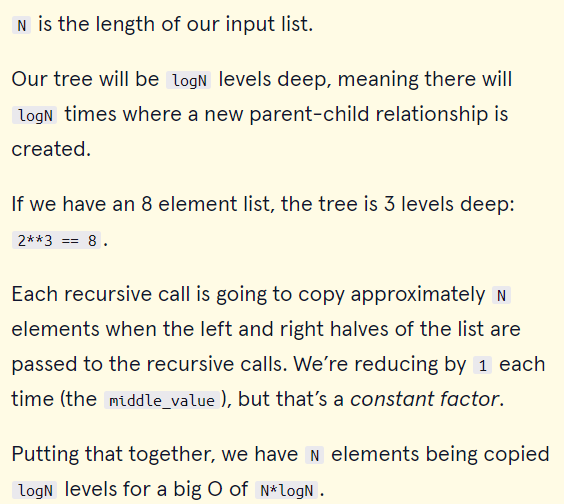

In [66]:
def build_bst(my_list):
  #base case
  if not my_list:
    return "No Child"
  middle_idx = len(my_list) // 2
  middle_value = my_list[middle_idx]
  print("Middle index: {0}".format(middle_idx))
  print("Middle value: {0}".format(middle_value))
  tree_node = {"data" : middle_value, "left_child" : build_bst(my_list[:middle_idx]), "right_child" : build_bst(my_list[middle_idx + 1:])}
  return tree_node
# For testing
sorted_list = [12, 13, 14, 15, 16]
binary_search_tree = build_bst(sorted_list)
print(binary_search_tree)

# fill in the runtime as a string
# 1, logN, N, N*logN, N^2, 2^N, N!
runtime = "N*logN"

Middle index: 2
Middle value: 14
Middle index: 1
Middle value: 13
Middle index: 0
Middle value: 12
Middle index: 1
Middle value: 16
Middle index: 0
Middle value: 15
{'data': 14, 'left_child': {'data': 13, 'left_child': {'data': 12, 'left_child': 'No Child', 'right_child': 'No Child'}, 'right_child': 'No Child'}, 'right_child': {'data': 16, 'left_child': {'data': 15, 'left_child': 'No Child', 'right_child': 'No Child'}, 'right_child': 'No Child'}}


## Find the node recursively in a linked list

In [ ]:
from Node import Node

class LinkedList:
  def __init__(self, value=None):
    self.head_node = Node(value)
  
  def get_head_node(self):
    return self.head_node
  
  def insert_beginning(self, new_value):
    new_node = Node(new_value)
    new_node.set_next_node(self.head_node)
    self.head_node = new_node
    
  def stringify_list(self):
    string_list = ""
    current_node = self.get_head_node()
    while current_node:
      if current_node.get_value() != None:
        string_list += str(current_node.get_value()) + "\n"
      current_node = current_node.get_next_node()
    return string_list
  
  def remove_node(self, value_to_remove):
    current_node = self.get_head_node()
    if current_node.get_value() == value_to_remove:
      self.head_node = current_node.get_next_node()
    else:
      while current_node:
        next_node = current_node.get_next_node()
        if next_node.get_value() == value_to_remove:
          current_node.set_next_node(next_node.get_next_node())
          current_node = None
        else:
          current_node = next_node
    
  def find_node_iteratively(self, value):
    current_node = self.head_node
    
    while current_node:
      if current_node.value == value:
        return current_node
      current_node = current_node.get_next_node()
      
    return None
    
  def find_node_recursively(self, value, current_node):
    if current_node == None:
      return None
    elif current_node.value == value:
      return current_node
    else:
      return self.find_node_recursively(value, current_node.get_next_node())

# Merge Sort

In [9]:
def merge_sort(items):
  if len(items) <= 1:
    return items

  middle_index = len(items) // 2
  left_split = items[:middle_index]
  right_split = items[middle_index:]

  left_sorted = merge_sort(left_split)
  right_sorted = merge_sort(right_split)

  return merge(left_sorted, right_sorted)

def merge(left, right):
  result = []

  while (left and right):
    if left[0] < right[0]:
      result.append(left[0])
      left.pop(0)
    else:
      result.append(right[0])
      right.pop(0)

  if left:
    result += left
  if right:
    result += right

  return result

unordered_list1 = [356, 746, 264, 569, 949, 895, 125, 455]
unordered_list2 = [787, 677, 391, 318, 543, 717, 180, 113, 795, 19, 202, 534, 201, 370, 276, 975, 403, 624, 770, 595, 571, 268, 373]
unordered_list3 = [860, 380, 151, 585, 743, 542, 147, 820, 439, 865, 924, 387]
ordered_list1 = merge_sort(unordered_list1)
ordered_list2 = merge_sort(unordered_list2)
ordered_list3 = merge_sort(unordered_list3)
print(ordered_list1)
print(ordered_list2)
print(ordered_list3)

[125, 264, 356, 455, 569, 746, 895, 949]
[19, 113, 180, 201, 202, 268, 276, 318, 370, 373, 391, 403, 534, 543, 571, 595, 624, 677, 717, 770, 787, 795, 975]
[147, 151, 380, 387, 439, 542, 585, 743, 820, 860, 865, 924]


# Quick Sort

In [10]:
#detailed explaination of two pointers algo.

# [5, 6, 2, 3, 1, 4]
# # we randomly select "3" and swap with the last element
# [5, 6, 2, 4, 1, 3]
 
# # We'll use () to mark our "lesser than" pointer
# # We'll use {} to mark our progress through the list
 
# [{(5)}, 6, 2, 4, 1, 3]
# # {5} is not less than 3, so the "lesser than" pointer doesn't move
 
# [(5), {6}, 2, 4, 1, 3]
# # {6} is not less than 3, so the "lesser than" pointer doesn't move
 
# [(5), 6, {2}, 4, 1, 3]
# # {2} is less than 3, so we SWAP the values...
# [(2), 6, {5}, 4, 1, 3]
# # Then we increment the "lesser than" pointer
# [2, (6), {5}, 4, 1, 3]
 
# [2, (6), 5, {4}, 1, 3]
# # {4} is not less than 3, so the "lesser than" pointer doesn't move
 
# [2, (6), 5, 4, {1}, 3]
# # {1} is less than 3, so we SWAP the values...
# [2, (1), 5, 4, {6}, 3]
# # Then we increment the "lesser than" pointer
# [2, 1, (5), 4, {6}, 3]
 
# # We've reached the end of the non-pivot values
# [2, 1, (5), 4, 6, {3}]
# # Swap the "lesser than" pointer with the pivot...
# [2, 1, (3), 4, 6, {5}]

In [141]:
from random import randrange, shuffle

def quicksort(list, start, end):
  # this portion of list has been sorted
  if start >= end:
    return
  print("Running quicksort on {0}".format(list[start: end + 1]))
  # select random element to be pivot
  pivot_idx = randrange(start, end + 1)
  pivot_element = list[pivot_idx]
  print("Selected pivot {0}".format(pivot_element))
  # swap random element with last element in sub-lists
  list[end], list[pivot_idx] = list[pivot_idx], list[end]

  # tracks all elements which should be to left (lesser than) pivot
  less_than_pointer = start
  
  for i in range(start, end):
    # we found an element out of place
    if list[i] < pivot_element:
      # swap element to the right-most portion of lesser elements
      print("Swapping {0} with {1}".format(list[i], pivot_element))
      list[i], list[less_than_pointer] = list[less_than_pointer], list[i]
      # tally that we have one more lesser element
      less_than_pointer += 1
  # move pivot element to the right-most portion of lesser elements
  list[end], list[less_than_pointer] = list[less_than_pointer], list[end]
  print("{0} successfully partitioned".format(list[start: end + 1]))
  # recursively sort left and right sub-lists
  quicksort(list, start, less_than_pointer - 1)
  quicksort(list, less_than_pointer + 1, end)


    
  
list = [5,3,1,7,4,6,2,8]
shuffle(list)
print("PRE SORT: ", list)
print(quicksort(list, 0, len(list) -1))
print("POST SORT: ", list)

PRE SORT:  [5, 4, 7, 6, 1, 3, 2, 8]
Running quicksort on [5, 4, 7, 6, 1, 3, 2, 8]
Selected pivot 2
Swapping 1 with 2
[1, 2, 7, 6, 5, 3, 8, 4] successfully partitioned
Running quicksort on [7, 6, 5, 3, 8, 4]
Selected pivot 4
Swapping 3 with 4
[3, 4, 5, 7, 8, 6] successfully partitioned
Running quicksort on [5, 7, 8, 6]
Selected pivot 5
[5, 7, 8, 6] successfully partitioned
Running quicksort on [7, 8, 6]
Selected pivot 6
[6, 8, 7] successfully partitioned
Running quicksort on [8, 7]
Selected pivot 7
[7, 8] successfully partitioned
None
POST SORT:  [1, 2, 3, 4, 5, 6, 7, 8]


# Radix Sort

In [1]:
def radix_sort(to_be_sorted):
  maximum_value = max(to_be_sorted)
  max_exponent = len(str(maximum_value))
  being_sorted = to_be_sorted[:]

  for exponent in range(max_exponent):
    position = exponent + 1
    index = -position

    digits = [[] for i in range(10)]

    for number in being_sorted:
      number_as_a_string = str(number)
      try:
        digit = number_as_a_string[index]
      except IndexError:
        digit = 0
      digit = int(digit)

      digits[digit].append(number)

    being_sorted = []
    for numeral in digits:
      being_sorted.extend(numeral)

  return being_sorted

unsorted_list = [830, 921, 163, 373, 961, 559, 89, 199, 535, 959, 40, 641, 355, 689, 621, 183, 182, 524, 1]
print(radix_sort(unsorted_list))

[1, 40, 89, 163, 182, 183, 199, 355, 373, 524, 535, 559, 621, 641, 689, 830, 921, 959, 961]
